#### CREDIT CARD FRAUD DETECTON

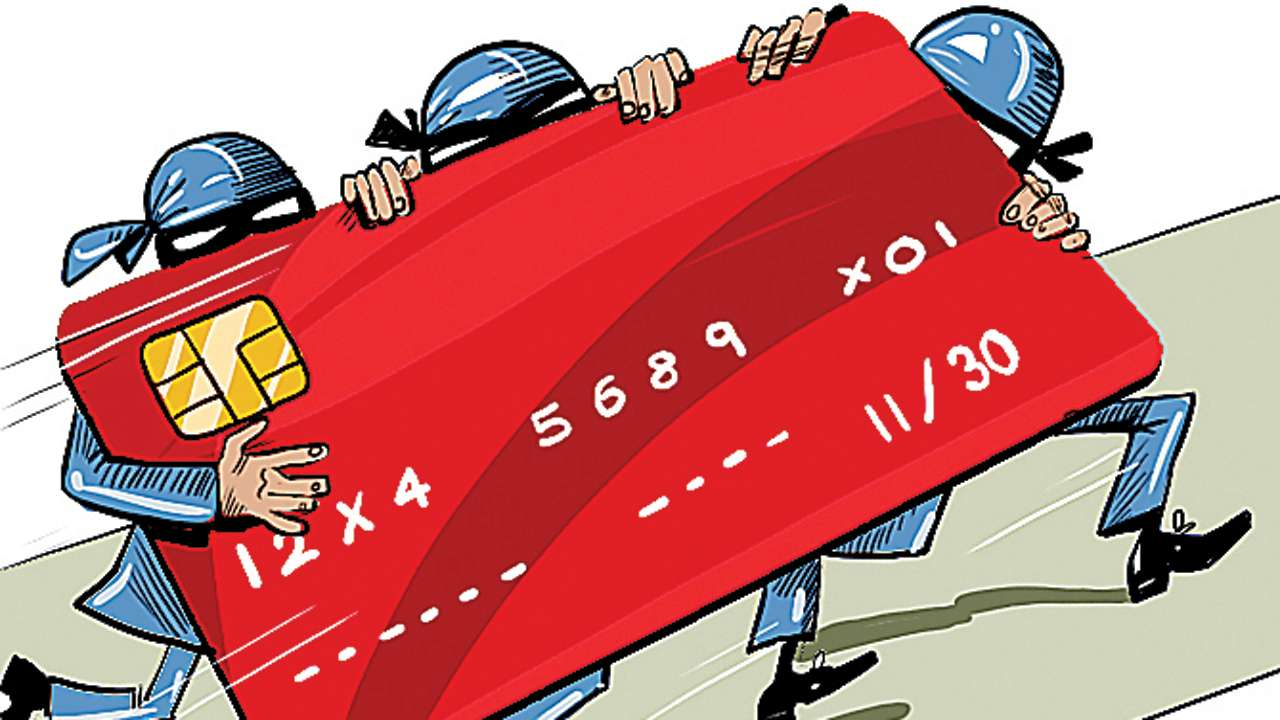

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Description of each column

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
print(df.info())

print('\nNumber of rows : ', df.shape[0])
print('Number of columns : ', df.shape[1])

print('\nTrain columns with null values: \n', df.isnull().sum())

print('\nNumber of total frauds or non frauds ( 0 : No Fraud, 1: Fraud )\n', df['Class'].value_counts().apply(lambda x:f'{x} ({x*100/len(df):0.2f}%)'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Checking the target classes

In [5]:
# The classes of frauds and non frauds
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [6]:
variables_count= df['Class'].value_counts().to_frame().reset_index()
variables_count['percent'] = variables_count["Class"].apply(lambda x : round(100*float(x) / len(df), 2))
variables_count = variables_count.rename(columns = {"index" : "Target", "Class" : "Count"})
variables_count

,Target,Count,percent
0,0,284315,99.83
1,1,492,0.17


C:\Users\burak\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

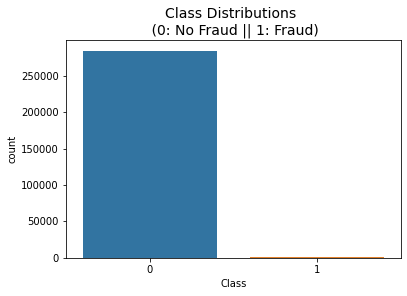

In [7]:
# visualization of classes
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

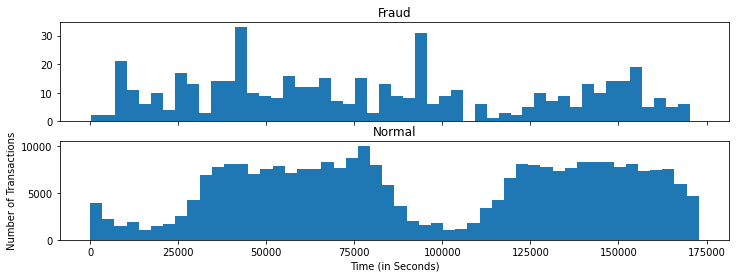

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

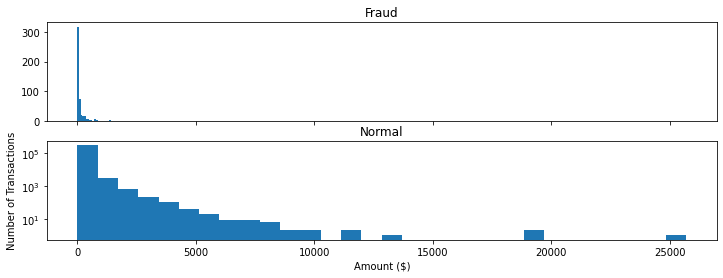

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

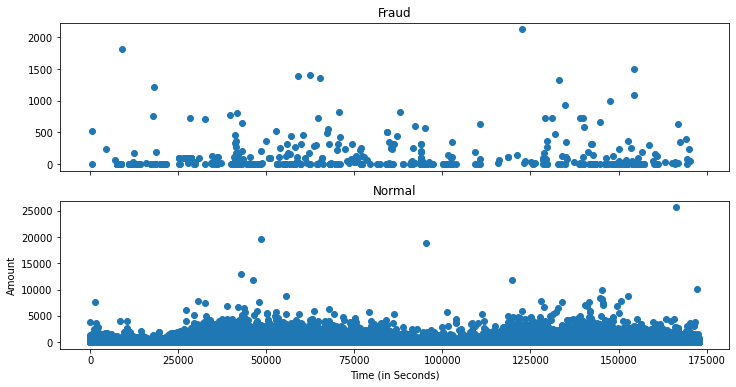

In [10]:
### Let's compare Time with Amount and see if we can learn anything new.
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

As we can see dataset is imbalanced. Let's check distributions

C:\Users\burak\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\burak\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Amount')

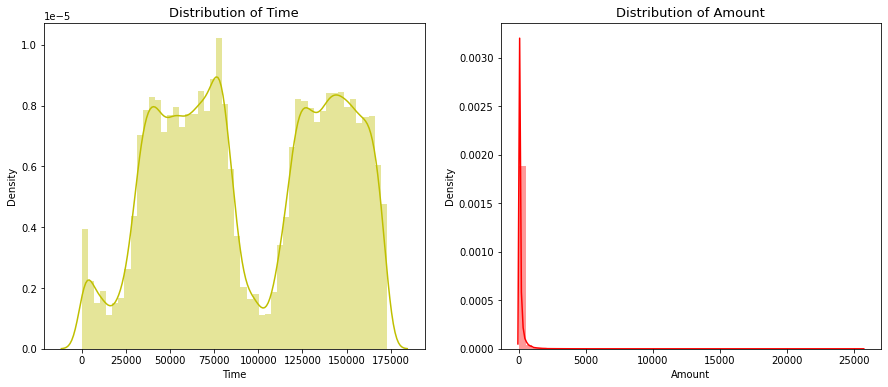

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1 = sns.distplot(df['Time'], ax=ax1, color='y')
ax2 = sns.distplot(df['Amount'], ax=ax2, color='r')
ax1.set_title('Distribution of Time', fontsize=13)
ax2.set_title('Distribution of Amount', fontsize=13)

To normalize the distribution we are going to use a method called Feature Scaling. In our case it is better to use the Robust Scaler algorithm because it's robust to outliers

In [12]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [13]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


#### MODEL

#### Split the data in training and test set.

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), 
                                                    df[['Class']].values, 
                                                    test_size=0.3,
                                                    random_state=24)

### 1. Logistic Regression

In [16]:
lr = LogisticRegression(max_iter=1000, random_state=24)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

C:\Users\burak\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


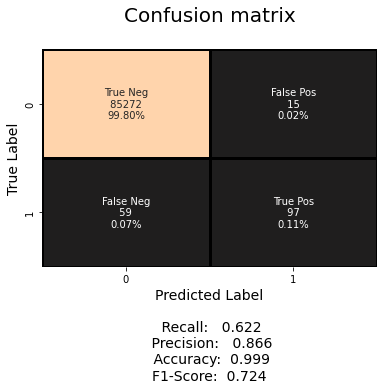

In [17]:
def plot_confusion_matrix(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)

    labels_name = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    labels_count = [value for value in cf_matrix.flatten()]
    labels_percentage = [ "{0:.2%}".format(value) for value in cf_matrix.flatten()/ np.sum(cf_matrix)]

    labels = [f'{x}\n {y} \n{z}' for x, y, z in zip(labels_name, labels_count, labels_percentage)]
    labels = np.array(labels, dtype=str).reshape(2,2)

    recall = cf_matrix[1,1]/(cf_matrix[1,0] + cf_matrix[1,1])
    precision = cf_matrix[1,1]/(cf_matrix[0,1] + cf_matrix[1,1])
    accuracy = (cf_matrix[0, 0] + cf_matrix[1,1])/ np.sum(cf_matrix)
    f1_score = (2*precision*recall)/(precision + recall)

    stats = '\n\n Recall:   {0:.03}\n Precision:   {1:.03}\n Accuracy:  {2:.03}\nF1-Score:  {3:.03}'.format(recall, precision, accuracy, f1_score)

    sns.heatmap(cf_matrix, annot=labels, fmt='', center=3, linewidth=3, linecolor='k', cbar=False)
    plt.title('Confusion matrix\n', fontsize=20)
    plt.xlabel('Predicted Label'+stats, fontsize=14)
    plt.ylabel('True Label', fontsize=14)

    plt.show()
plot_confusion_matrix(y_test, y_pred)

* Upper Left Square: The amount of correctly classified by model of no fraud transactions.
* Upper Right Square: The amount of incorrectly classified transactions as fraud cases, but the actual label is no fraud .
* Lower Left Square: The amount of incorrectly classified transactions as no fraud cases, but the actual label is fraud .
* Lower Right Square: The amount of correctly classified by our model of fraud transactions.

Recall: Out of all the positive classes, how much we predicted correctly. (TP/TP+FN)

Precision: Out of all the positive classes we have predicted, how many are actually positive. (TP/TP+FP)

Accuracy: Out of all the classes, how much we predicted correctly

F-measure: 2(Recall) (Precision)/(Recall + Precision)

### 2. Predict Proba

In [18]:
# predict_proba gives you the probabilities for the target (0 and 1 in this case) in array form. 
#The number of probabilities for each row is equal to the number of categories in target variable.

y_prob = lr.predict_proba(X_test)
y_prob = y_prob[:, 1] # Probability of getting the output 1 (Fraud)

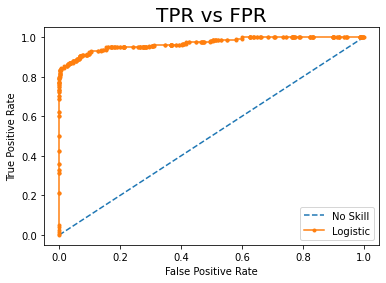

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# gmeans = np.sqrt(tpr*(1-fpr))
# ix = np.argmax(gmeans)
# print("Best thresholds=%f, G-Mean=%.3f" %(thresholds[ix], gmeans[ix]))

plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='best', sizes=(200, 100))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('TPR vs FPR', fontsize=20)
plt.show()

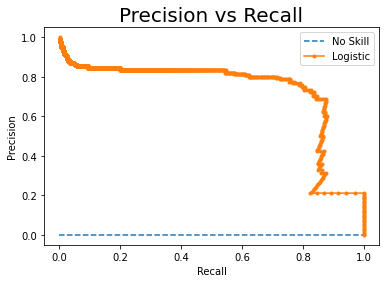

In [20]:
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y_test, y_prob)
no_skill = len(y_test[y_test==1])/ len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_precision, lr_recall, marker='.', label='Logistic')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision vs Recall', fontsize=20)
plt.show()

### 3. Change the Threshold

In [21]:
from ipywidgets import interact,  FloatSlider

print("Slide, Range -> (0.001, 0.04)")
def update(var=0.004):
    print("y_prob should be greater than >", var)
    predict_mine = np.where(y_prob > var, 1, 0)
    plot_confusion_matrix(y_test, predict_mine)

interact(update, var=FloatSlider(min=0.001, max=0.04, step=0.001))

Slide, Range -> (0.001, 0.04)


interactive(children=(FloatSlider(value=0.001, description='var', max=0.04, min=0.001, step=0.001), Output()),…

<function __main__.update(var=0.004)>

### 4. Logistic Regression with balanced class weight

C:\Users\burak\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


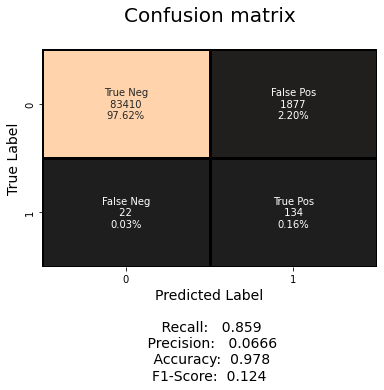

In [24]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train.values, y_train)
y_pred_b = model.predict(X_test.values)
plot_confusion_matrix(y_test, y_pred_b)

### SAVE MODEL AS PICKLE

In [25]:
import pickle
pickle.dump(model, open('model1.pkl', 'wb'))